In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob

from __future__ import unicode_literals
from IPython.core.display import display, HTML

pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_rows', 50)

%matplotlib inline

In [9]:
# Global configurations
# ---------------------

# Expand the notebook to the width of the browser
display(HTML("<style>.container { width:100% !important; }</style>"))

# Matplotlib style
plt.style.use('seaborn-colorblind')

# Use LaTeX and its body font for the diagrams' text.
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']  = ['Nimbus Roman Becker No9L']

# Font sizes
SIZE = 24
plt.rc('font', size=SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)  # fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE-2)  # legend fontsize
plt.rc('figure', titlesize=SIZE)  # # size of the figure title

# Use thinner lines for axes to avoid distractions.
mpl.rcParams['axes.linewidth']    = 1
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['lines.linewidth'] = 2


# Do not use a box for the legend to avoid distractions.
mpl.rcParams['legend.frameon'] = False

# Restore part of matplotlib 1.5 behavior
mpl.rcParams['patch.force_edgecolor'] = True
mpl.rcParams['errorbar.capsize'] = 3

# Helpers
# -------

# Use coordinated colors. These are the "Tableau 20" colors as 
# RGB. Each pair is strong/light. For a theory of color    
tableau20 = [(31 , 119, 180), (174, 199, 232), # blue        [ 0,1 ]
             (255, 127, 14 ), (255, 187, 120), # orange      [ 2,3 ]
             (44 , 160, 44 ), (152, 223, 138), # green       [ 4,5 ]
             (214, 39 , 40 ), (255, 152, 150), # red         [ 6,7 ]
             (148, 103, 189), (197, 176, 213), # purple      [ 8,9 ]
             (140, 86 , 75 ), (196, 156, 148), # brown       [10,11]
             (227, 119, 194), (247, 182, 210), # pink        [12,13]
             (188, 189, 34 ), (219, 219, 141), # yellow      [14,15]
             (23 , 190, 207), (158, 218, 229), # cyan        [16,17]
             (65 , 68 , 81 ), (96 , 99 , 106), # gray        [18,19]
             (127, 127, 127), (143, 135, 130), # gray        [20,21] 
             (165, 172, 175), (199, 199, 199), # gray        [22,23]
             (207, 207, 207)]                   # gray        [24]
  
# Scale the RGB values to the [0, 1] range, which is the format 
# matplotlib accepts.    
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# Return a single plot without right and top axes
def fig_setup():
    fig, ax = plt.subplots(2, 2)
    fig.set_size_inches((10,6))
    #fig = plt.figure(figsize=(10,6))
    #ax = fig.add_subplot(111)  
    #ax.spines["top"].set_visible(False)  
    #ax.spines["right"].set_visible(False)  
    #ax.get_xaxis().tick_bottom()  
    #ax.get_yaxis().tick_left()
    
    return fig, ax

In [24]:
#Macrostate data

def get_macrostate_data(path, dur, en, iters):

    #macro_ue_df = pd.DataFrame(columns=range(1,5), index=range(1, iters+1))
    macro_ev_df = pd.DataFrame(columns=range(1,5), index=range(1, iters+1))
    macros = glob.glob('%s/macrostate*.txt'%(path))

    for f in macros:

        try:
            it = int(f.split('/')[2].strip().split('-')[1].strip().split('.')[0])
        except:
            it = iters

        data = open(f, 'r').readlines()

        blank=0
        vals=[]
        for line in data:

            if line == '\n':
                blank+=1
                continue

            if blank==9:
                vals.append(float(line.strip()))

        macro_ev_df.loc[it] = vals

    #ax = macro_ue_df.plot(kind='line',marker='o',colormap='gist_rainbow')
    #ax.set_xlabel('Iterations')
    #ax.set_ylabel('Uncertainty in Eigen values')
    #ax.set_xlim(0,iters+1)
    #ax.set_title('Uncertainty of macrostate eigen values \n at each iteration - ensemble size=%s, dur=%s ns'%(en, dur))
    #plt.savefig('./data_%s_with_ue/dur-%s-ensemble-%s-iters-%s/uncertainty-macro.png'%(dur*en_size*iters, dur, en_size, iters))

    return macro_ev_df

In [25]:
#Microstate data

def get_microstate_data(path, dur, en, iters):
    #micro_ue_df = pd.DataFrame(columns=range(1,11), index=range(1, iters+1))
    micro_ev_df = pd.DataFrame(columns=range(1,22), index=range(1, iters+1))
    micros = glob.glob('%s/microstate*.txt'%(path))

    for f in micros:    

        try:
            it = int(f.split('/')[2].strip().split('-')[1].strip().split('.')[0])
        except:
            it=iters

        data = open(f, 'r').readlines()

        blank=0
        vals=[]
        for line in data:

            if line == '\n':
                blank+=1
                continue

            if blank==7:
                vals.append(float(line.strip()))

        micro_ev_df.loc[it] = vals



    #ax = micro_ue_df.plot(kind='line',marker='o',colormap='gist_rainbow')
    #ax.set_xlabel('Iterations')
    #ax.set_ylabel('Uncertainty in Eigen values')
    #ax.set_xlim(0,iters+1)
    #ax.set_title('Uncertainty of microstate eigen values \n at each iteration - ensemble size=%s, dur=%s ns'%(en, dur))
    #plt.savefig('./data_%s_with_ue/dur-%s-ensemble-%s-iters-%s/uncertainty-macro.png'%(dur*en_size*iters, dur, en_size, iters))

    return micro_ev_df


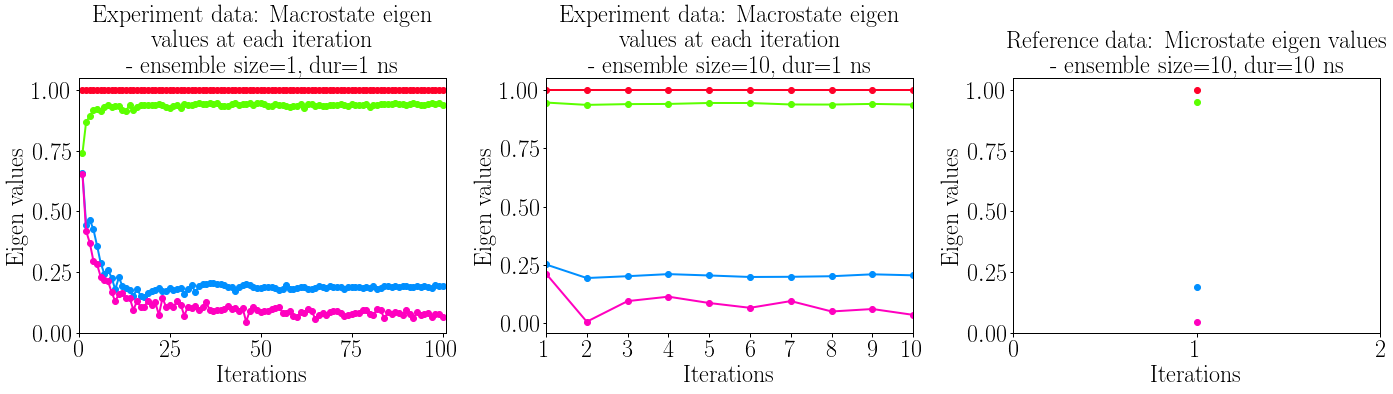

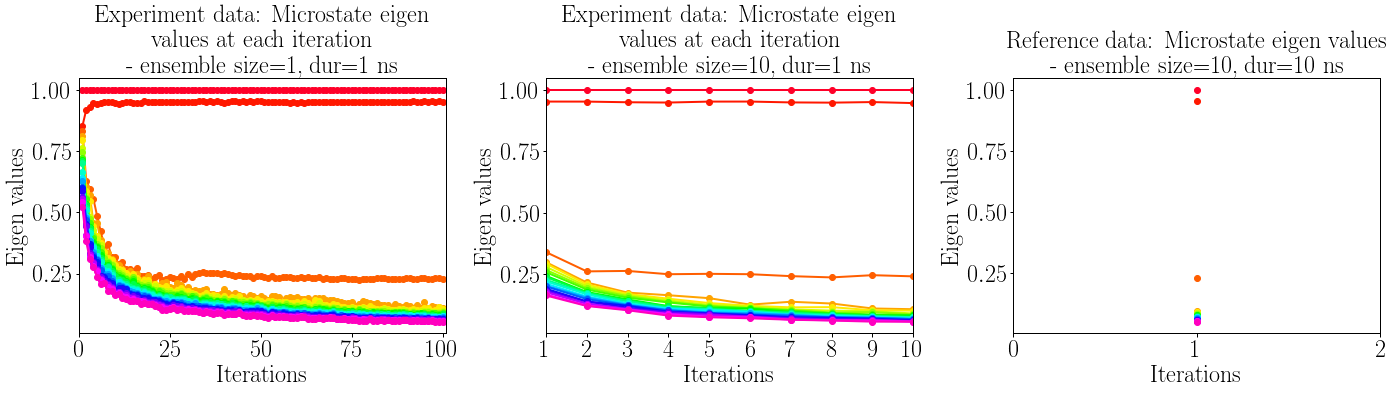

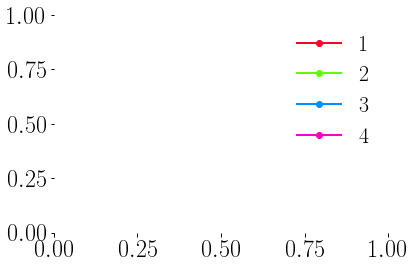

In [63]:
#-------------------------------------------------------------------------------------------------------------
# Plot macrostates
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((20,6))

dur=1
en=1
iters=100

path = './dur-%s-ensemble-%s-iters-%s'%(dur,en,iters)
macro_ev_df_iters_100 = get_macrostate_data(path, dur, en, iters)
ax1 = macro_ev_df_iters_100.plot(ax=ax[0],kind='line',marker='o',colormap='gist_rainbow', legend=False)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Eigen values')
ax1.set_xlim(0,iters+1)
ax1.set_title('Experiment data: Macrostate eigen \n values at each iteration \n - ensemble size=%s, dur=%s ns'%(en, dur))
#ax1.legend(bbox_to_anchor=(1.2, 1.05))
ax1.legend().set_visible(False)

dur=1
en=10
iters=10
    
path = './dur-%s-ensemble-%s-iters-%s'%(dur,en,iters)
macro_ev_df_iters_10 = get_macrostate_data(path, dur, en, iters)
ax1 = macro_ev_df_iters_10.plot(ax=ax[1],kind='line',marker='o',colormap='gist_rainbow', legend=False)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Eigen values')
ax1.set_xlim(0,iters+1)
ax1.set_title('Experiment data: Macrostate eigen \n values at each iteration \n - ensemble size=%s, dur=%s ns'%(en, dur))
#ax1.legend(bbox_to_anchor=(1.2, 1.05))
ax1.legend().set_visible(False)
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax1.set_xlim(1,10)

dur=10
en=10
iters=1
path = '../../ref_data/'
macro_ev_df_ref = get_macrostate_data(path, dur, en, iters)
ax1 = macro_ev_df_ref.plot(ax=ax[2],kind='line',marker='o',colormap='gist_rainbow', legend=False)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Eigen values')
ax1.set_xlim(0,iters+1)
ax1.set_title('Reference data: Microstate eigen values \n - ensemble size=%s, dur=%s ns'%(en, dur))
ax1.set_xticks([0,1,2])
ax1.set_xlim(0,2)

#h1, l1 = ax1.get_legend_handles_labels()
#plt.legend(h1,l1, bbox_to_anchor=(-2, 2), ncol=4)
#ax2.legend().set_visible(False)
fig.tight_layout()


#-------------------------------------------------------------------------------------------------------------
# Plot macrostates
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((20,6))

dur=1
en=1
iters=100

path = './dur-%s-ensemble-%s-iters-%s'%(dur,en,iters)
micro_ev_df_iters_100 = get_microstate_data(path, dur, en, iters)
ax2 = micro_ev_df_iters_100.plot(ax=ax[0],kind='line',marker='o',colormap='gist_rainbow', legend=False)
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Eigen values')
ax2.set_xlim(0,iters+1)
ax2.set_title('Experiment data: Microstate eigen \n values at each iteration \n - ensemble size=%s, dur=%s ns'%(en, dur))
#ax2.legend(bbox_to_anchor=(1.2, 1.05))
ax2.legend().set_visible(False)


dur=1
en=10
iters=10
    
path = './dur-%s-ensemble-%s-iters-%s'%(dur,en,iters)

micro_ev_df_iters_10 = get_microstate_data(path, dur, en, iters)
ax2 = micro_ev_df_iters_10.plot(ax=ax[1],kind='line',marker='o',colormap='gist_rainbow', legend=False)
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Eigen values')
ax2.set_xlim(0,iters+1)
ax2.set_title('Experiment data: Microstate eigen \n values at each iteration \n - ensemble size=%s, dur=%s ns'%(en, dur))
#ax2.legend(bbox_to_anchor=(1.2, 1.05))
ax2.legend().set_visible(False)
ax2.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax2.set_xlim(1,10)


dur=10
en=10
iters=1
path = '../../ref_data/'
micro_ev_df_ref = get_microstate_data(path, dur, en, iters)
ax2 = micro_ev_df_ref.plot(ax=ax[2],kind='line',marker='o',colormap='gist_rainbow', legend=False)
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Eigen values')
ax2.set_xlim(0,iters+1)
ax2.set_title('Reference data: Microstate eigen values \n - ensemble size=%s, dur=%s ns'%(en, dur))
ax2.set_xticks([0,1,2])
ax2.set_xlim(0,2)
fig.tight_layout()


#-------------------------------------------------------------------------------------------------------------


fig, ax = plt.subplots(1, 1)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
#ax.get_xaxis().tick_bottom()  
#ax.get_yaxis().tick_left()
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1,l1)
fig.canvas.draw()
fig.show()